# Перед тем как мы начнем

В двух словах про Python

Тут будет лекция

In [53]:
print("Hello world")

Hello world


In [55]:
# Комментарий
# Назначеие переменных

my_var = 5

In [56]:
if my_var > 3:
    print("This is more than 3!")
else:
    print("Not yet")

This is more than 3!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [57]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [59]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [62]:
2+2*2

6

In [3]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [6]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [7]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [9]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [10]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


Мы проверили датасет на наличие пустых значений. 

Пустых значений не обнаружено! :)


In [12]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Давайте тут вспомним, что вообще такое коэффициент корреляции? От чего он зависит? О чем говорит? А о чем не говорит? В каких пределах измеряется? Какие значения КофКорр считаются значимыми? 

In [14]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['Attrition'].nunique()

2

In [100]:
# Как мы с вами только что убедились, есть только два значения в поле Attrition

In [15]:
# Теперь глянем, что это за гендеры?
df_hr['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [ ]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

In [120]:
df_hr['Attrition'].count()

1470

In [121]:
df_hr['Attrition'].sum()

'YesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoY

In [ ]:
# У нас в датасете нет бинарных значений, в которых использовались бы цифры 0 и 1, а не тектовые выражения, как Yes и No.

In [124]:
df_hr['Attrition'].sum()

'YesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoY

In [18]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6


##  Сейчас будет чуть сложнее

In [19]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64
* float64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

<AxesSubplot:xlabel='MonthlyIncome'>

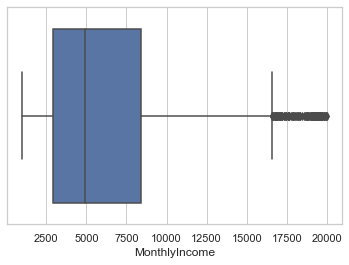

In [25]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["MonthlyIncome"])

In [ ]:
# Видим, что распределение явно смещенное, все выбросы справа
# Что это за распределение? 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей

Text(0, 0.5, 'Amount of employees')

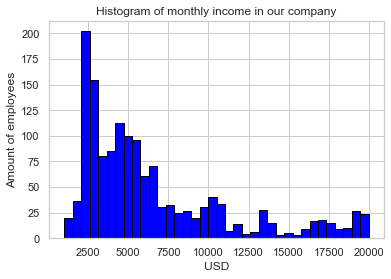

In [125]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of monthly income in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что распределение похоже на Лог-нормальное, 
# но мы его еще не проходили, поэтому ничего по нему проверить не можем, 
# а просто степенно ждем пары по статистике. 

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [31]:
import numpy as np

In [32]:
# Среднее значение по месячному доходу
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [33]:
# А медиана? 
np.median(df_hr.MonthlyIncome)

4919.0

In [ ]:
# Обращает внимание что медиана ниже среднего значения где-то на 1500.

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [34]:
# Variance (дисперсия) месячного дохода
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [36]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [37]:
3*np.std(df_hr.MonthlyIncome)

14119.065494469012

In [76]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения? 
# Ответ Лизы: для расчетов аномальных значений!!!

# Сделаем подвыборку из выборки

In [60]:
# Выделим в отдельные массивы сотрудников с разными Attrition - статусами
df_hr_g1 = df_hr[df_hr['Attrition'] == 'Yes']
df_hr_g0 = df_hr[df_hr['Attrition'] == 'No']

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


In [61]:
df_hr_g0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0


In [62]:
mylist = [2,33,4,5]

In [66]:
print("Count of Attrition = 'Yes'\
 is {} and for Attrition = 'No' is {}".format(len(df_hr_g1),
                                           len(df_hr_g0)))

Count of Attrition = 'Yes' is 237 and for Attrition = 'No' is 1233


In [67]:
print("Median of MonthlyIncome for Attrition = 'Yes' \
is {} and for Attrition = 'No' is {}".format(np.median(df_hr_g1.MonthlyIncome),
                                           np.median(df_hr_g0.MonthlyIncome)))

Median of MonthlyIncome for Attrition = 'Yes' is 3202.0 and for Attrition = 'No' is 5204.0


<AxesSubplot:xlabel='MonthlyIncome'>

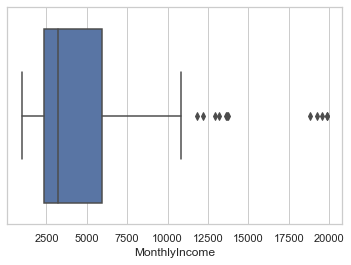

In [68]:
sns.boxplot(x=df_hr_g1["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

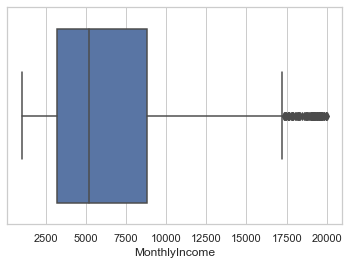

In [69]:
sns.boxplot(x=df_hr_g0["MonthlyIncome"])

Text(0, 0.5, 'Amount of employees')

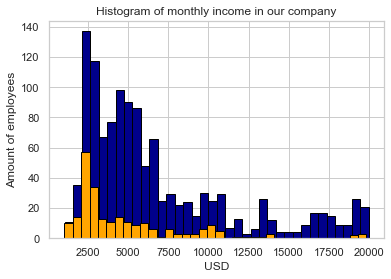

In [77]:
plt.hist(df_hr_g0['MonthlyIncome'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of monthly income in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что распределения не однородны.

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть:
* сотрудники с высоким месячным доходом,
* сотрудники, которые проработали в компании более 15 лет

Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

В данном случае подобных аномальных значений нет.
Если же взять значения за пределами двух среднеквадратических отклонений, то получаем 128 сотрудников с довольно высоким месячным доходом.

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [109]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_MonthlyIncome'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 2*np.std(df_hr.MonthlyIncome),                 
                            1, 0)

In [110]:
df_anomally_MonthlyIncome = df_hr[df_hr['anomally_MonthlyIncome'] == 1]

df_anomally_MonthlyIncome

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal,anomally_DailyRate,anomally_MonthlyIncome
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8,0,0,1
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,2,Female,83,3,5,Manager,1,Single,18947,22822,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1,0,0,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,Y,No,12,3,4,80,0,23,0,3,22,15,15,8,0,0,1
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,2,Female,43,2,5,Research Director,3,Divorced,18740,16701,5,Y,Yes,12,3,4,80,1,29,2,2,27,3,13,8,0,0,1
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,140,3,Female,32,2,5,Manager,4,Married,18844,21922,9,Y,No,21,4,4,80,1,30,3,3,3,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0,0,0,1
1377,49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1941,2,Male,42,3,5,Research Director,4,Married,19161,13738,3,Y,No,15,3,4,80,0,28,3,3,5,4,4,3,0,0,1
1401,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,1973,3,Male,71,4,5,Manager,2,Married,19636,25811,4,Y,Yes,18,3,1,80,1,35,0,3,10,9,1,4,0,0,1
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,4,Male,87,3,5,Manager,4,Single,19431,15302,2,Y,No,13,3,3,80,0,21,3,2,6,0,1,3,0,0,1


## Оценка лет в компании - стаж сотрудников

(array([215., 255., 306., 166., 162., 152.,  38.,  38.,  21.,  24.,  41.,
         17.,  10.,   6.,   2.,   4.,   8.,   1.,   3.,   1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40.]),
 <BarContainer object of 20 artists>)

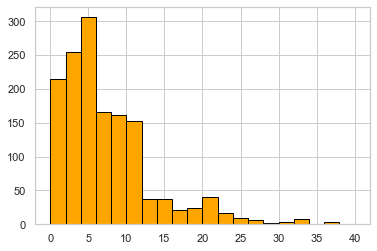

In [111]:
plt.hist(df_hr['YearsAtCompany'], color = 'orange', edgecolor = 'black', bins = 20)

Давайте также посчитаем где лежит 90-й перцентиль. 



In [112]:
df_hr.YearsAtCompany.quantile(q=0.9)

15.0

Это означает, что 90% сотрудников в выборке работают в компании менее 15 лет.

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого 15 и более отсутствий. 

In [128]:
df_hr_ab = df_hr[df_hr['YearsAtCompany'] > 14]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal,anomally_DailyRate,anomally_MonthlyIncome
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7,0,0,0
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,1,Female,42,2,3,Healthcare Representative,4,Married,10248,2094,3,Y,No,14,3,4,80,1,24,4,3,22,6,5,17,0,0,0
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,Y,No,12,3,4,80,0,23,0,3,22,15,15,8,0,0,1
55,33,No,Travel_Frequently,515,Research & Development,1,2,Life Sciences,1,73,1,Female,98,3,3,Research Director,4,Single,13458,15146,1,Y,Yes,12,3,3,80,0,15,1,3,15,14,8,12,0,0,0
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,2,Female,43,2,5,Research Director,3,Divorced,18740,16701,5,Y,Yes,12,3,4,80,1,29,2,2,27,3,13,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,37,No,Travel_Rarely,161,Research & Development,10,3,Life Sciences,1,2017,3,Female,42,4,3,Research Director,4,Married,13744,15471,1,Y,Yes,25,4,1,80,1,16,2,3,16,11,6,8,0,0,0
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,1,Male,56,3,5,Manager,3,Married,18880,17312,5,Y,No,11,3,1,80,0,24,2,2,22,6,4,14,0,0,1
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,No,23,4,3,80,1,21,3,3,20,7,0,10,0,0,0
1447,36,No,Non-Travel,301,Sales,15,4,Marketing,1,2036,4,Male,88,1,2,Sales Executive,4,Divorced,5406,10436,1,Y,No,24,4,1,80,1,15,4,2,15,12,11,11,0,0,0


Получили 158 человек. У всех из них месячный доход выше среднего.

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Набор содержит информацию о 1470 сотрудниках, часть из которых уже покинули компанию. Исторические данные смешаны с фактическими данными о сотрудниках. Это мы понимаем по столбцу «Attrition» – Yes / No.
2. В наборе данных нет пропущенных значений.
3. Так как в датасете представлены данные о покинувших компанию сотрудниках (Attriction), будет интересно посмотреть, что может влиять на факт их ухода. Так, мы видим, что доступны такие данные как «EnvironmentSatisfaction», «JobSatisfaction», «RelationshipSatisfaction», «WorkLifeBalance». Если предположить, что для этих категорий анализа использовалась 5-балльная шкала, то, имея средние значения на уровне 2,7 баллов и максимальный – 4 балла, можно утверждать, что в компании достаточно неблагоприятная атмосфера и условия работы.
4.	Продолжая тему причин ухода, оценим коррелляцию таких показателей как «EnvironmentSatisfaction», «JobSatisfaction» с денежными значениями «MonthlyRate», «MonthlyIncome», «DailyRate», «HourlyRate». Коррелляции не обнаружено. 
5.	Прослеживается достаточно очевидная сильная (более 0,6 – 0,7) связь: чем старше сотрудник, тем больше времени он проработал в компании, следовательно, его «JobLevel» выше, а значит выше и месячный доход. 
6.	Далее обратимся к одному из самых ярких, для HR, показателей – MonthlyIncome. Рассматривая ящик с усами, можно сделать вывод, что распределение явно смещенное: большая часть заработных плат находится в достаточно узком промежутке (от 2500 до 8000); также наблюдается много выбросов. 
7.	Медиана для «MonthlyIncome» for «Attrition» = 'Yes' равно 3202.0, в то время как для «Attrition» = 'No' равна 5204.0. Глядя на ящик с усами выше, можно предположить, что покинувшие компанию сотрудники обладали меньшей средней зарплатой. Возможно, все-таки, это также послужило причиной ухода. 
8.	Если считать, что аномальное значение – это значение суммы среднего и стандартного отклонения, умноженного на 3, то в данном датасете аномальные значения «MonthlyIncome» отсутствуют.Если же брать в рамках двух стандартных отклонений , то количество аномальных значений резко возрастает до 128. Это сотрудники с заработной платой от 17 до 19 тысяч у.е.
9.	В последнем пункте мною был проведен анализ количества проработанных лет сотрудниками в компании. Так, выяснилось, что наибольшее количество сотрудников работают в компании от 0 до 10 лет. Если посчитать, где лежит 90% перцентиль, то выходит, что 90% сотрудников в выборке работают в компании менее 15 лет. Если принять это значение границу аномального, то получим, что более 15 лет проработали 126 сотрудников. 


# Выводы по заданию

Что мы сейчас сделали: 
1. Загрузили датасет
2. Провели по нему ряд базовых проверок
3. Научились считать базовые вещи - медиану, стандартное отклонение, дисперсию etc
4. Научились рисовать базовые графички с распределениями
5. Начились дробить датасеты по условию (делать подвыборки)

# В домашке вас ждет

* Сделайте все тоже самое, но на примере другого набора данных. На выходе должны получится достоверные результаты разведочного исследования (как в части "Выводы по набору данных")
* Превращаем знания в навыки

## Pro tip: 

* В ходе выполнения домашки вам может потребоваться итерация вопрос-ответ с коллегами или преподавателем. Начинайте делать домашку заранее, чтобы оставить в запасе больше времени на итерации вопрос-ответов и прояснение ситуации. Это работает не только с домашками. 